<a href="https://colab.research.google.com/github/HemanthVerma/HemanthVerma/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"hemanthv4rma","key":"d8a5e97694583aee53098fd5ef880ca0"}'}

In [ ]:
pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

mkdir: cannot create directory ‘traffic_sign_dataset’: File exists
/content/traffic_sign_dataset


In [ ]:
!kaggle datasets list  -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          58612        829  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           8154        225  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            281          7  0.75             
bhavinmoriya/german-traffic-sign-recognition-bench

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign 
%cd ..

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)
/content


In [ ]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign -d traffic_sign_dataset
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm -rf traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D


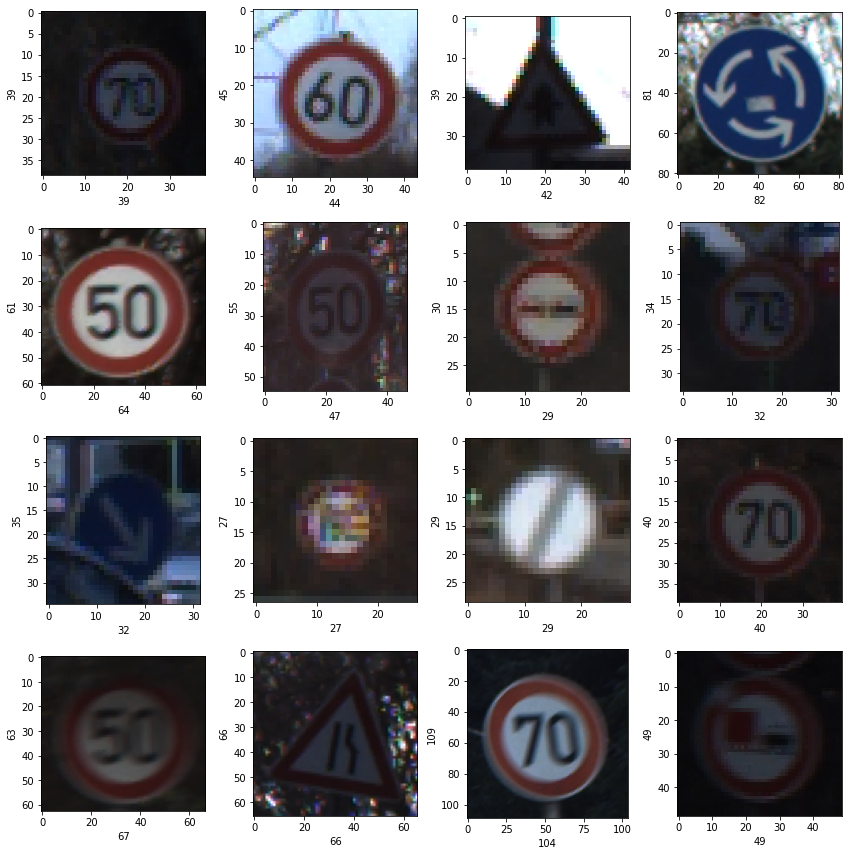

In [ ]:
plt.figure(figsize=(12,12))
path="traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize =10)
  plt.ylabel(rand_img.shape[0],fontsize =10)



In [ ]:
dime1 =[]
dime2=[]

for i in range(0,43):
  labels='traffic_sign_dataset/Train' +'/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels+'/'+x)
    dime1.append(img.shape[0])
    dime2.append(img.shape[1])

In [ ]:
print("Dimension 1 Mean :",np.mean(dime1),"\nDimension 2 Mean:",np.mean(dime2)) 

Dimension 1 Mean : 50.328929582493814 
Dimension 2 Mean: 50.83587951745773


In [ ]:
images = []
label_id= []

for i in range(43):
  labels='traffic_sign_dataset/Train'+'/{0}'.format(i)
  image_path =os.listdir(labels)
  for x in image_path:
    img= Image.open(labels + '/'+x)
    img=img.resize((50,50))
    img=np.array(img)
    images.append(img)
    label_id.append(i)


In [ ]:
images = np.array(images)
images = images/255

In [ ]:
label_id =np.array(label_id)
label_id.shape

(39209,)

In [ ]:
images.shape

(39209, 50, 50, 3)

In [ ]:
label_counts=pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [ ]:
#splitting Data
x_train,x_val,y_train,y_val =train_test_split(images,label_id,test_size=0.2,random_state=42)

In [ ]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=x_train.shape[1:],activation = 'relu',padding='same'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))

In [ ]:
model.compile(loss ='sparse_categorical_crossentropy',optimizer ='adam',metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [ ]:
model.fit(x_train, y_train, epochs =10, batch_size =128 , validation_data = (x_val,y_val),verbose=2)

Epoch 1/10
246/246 - 15s - loss: 2.4626 - accuracy: 0.3240 - val_loss: 1.0965 - val_accuracy: 0.7091 - 15s/epoch - 61ms/step
Epoch 2/10
246/246 - 5s - loss: 1.0783 - accuracy: 0.6621 - val_loss: 0.4364 - val_accuracy: 0.8930 - 5s/epoch - 21ms/step
Epoch 3/10
246/246 - 4s - loss: 0.7065 - accuracy: 0.7749 - val_loss: 0.2696 - val_accuracy: 0.9416 - 4s/epoch - 18ms/step
Epoch 4/10
246/246 - 4s - loss: 0.5494 - accuracy: 0.8211 - val_loss: 0.1931 - val_accuracy: 0.9603 - 4s/epoch - 18ms/step
Epoch 5/10
246/246 - 4s - loss: 0.4639 - accuracy: 0.8504 - val_loss: 0.1442 - val_accuracy: 0.9685 - 4s/epoch - 18ms/step
Epoch 6/10
246/246 - 4s - loss: 0.4037 - accuracy: 0.8667 - val_loss: 0.1191 - val_accuracy: 0.9767 - 4s/epoch - 18ms/step
Epoch 7/10
246/246 - 4s - loss: 0.3759 - accuracy: 0.8767 - val_loss: 0.0992 - val_accuracy: 0.9776 - 4s/epoch - 18ms/step
Epoch 8/10
246/246 - 4s - loss: 0.3377 - accuracy: 0.8898 - val_loss: 0.0947 - val_accuracy: 0.9819 - 4s/epoch - 18ms/step
Epoch 9/10
246

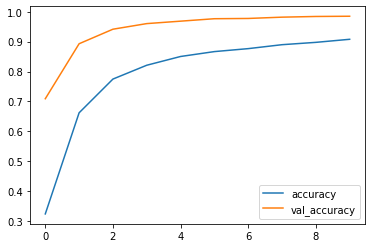

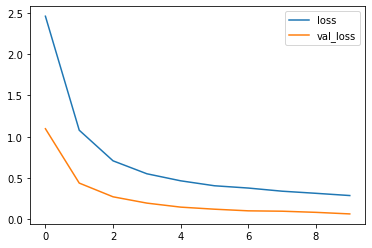

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

In [ ]:
test_path='traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [ ]:
from PIL   import Image

def scaling